In [23]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import community
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import os
import sys 
sys.path.insert(1, '../congress_network')

from viral_centrality import viral_centrality

In [24]:
# Data
f = open(r'../congress_network/congress_network_data.json')
data = json.load(f)

inList = data[0]['inList']
inWeight = data[0]['inWeight']
outList = data[0]['outList']
outWeight = data[0]['outWeight']
usernameList = data[0]['usernameList']

# Attributs
attributes_df = pd.read_csv('../congress_network/congress_member_attributes.csv')
def recode_age(age) :
    if age<40 :
        return "Moins de 40 ans"
    elif age<50:
        return "40 à 49 ans"
    elif age<60:
        return "50 à 59 ans"
    elif age<70:
        return "60 à 69 ans"
    elif age<80:
        return "70 à 79 ans"
    else:
        return "Plus de 80 ans"
attributes_df["age_recode"] = attributes_df["age"].apply(recode_age)

# On ajoute les degrés
attributes_df['in_strength'] = 0
attributes_df['out_strength'] = 0

for i in range(len(attributes_df)) :
    attributes_df["in_strength"][i] = sum(inWeight[i])
    attributes_df["out_strength"][i] = sum(outWeight[i])

attributes_df["sex_party"] = attributes_df["sex"] + attributes_df["party"]

# Viral centrality : mesure proposée par Fink et al. (2023)
attributes_df["viral_centrality"] = viral_centrality(inList, inWeight, outList, Niter = -1, tol = 0.001)
attributes_df["strength"] = attributes_df["in_strength"] + attributes_df["out_strength"]

attributes_df


/var/folders/v4/6pdcd6_s5c9c0f6cpb908t8c0000gn/T/ipykernel_7670/1104925190.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  attributes_df["in_strength"][i] = sum(inWeight[i])
/var/folders/v4/6pdcd6_s5c9c0f6cpb908t8c0000gn/T/ipykernel_767

,congress_member,sex,age,party,chamber,age_recode,in_strength,out_strength,sex_party,viral_centrality,strength
0,SenatorBaldwin,F,60,D,S,60 à 69 ans,0.119889,0.080000,FD,0.094066,0.199889
1,SenJohnBarrasso,H,70,R,S,70 à 79 ans,0.129438,0.094637,HR,0.107233,0.224076
2,SenatorBennet,H,60,D,S,60 à 69 ans,0.188040,0.144414,HD,0.165182,0.332454
3,MarshaBlackburn,F,70,R,S,70 à 79 ans,0.078533,0.068803,FR,0.076794,0.147336
4,SenBlumenthal,H,76,D,S,70 à 79 ans,0.101221,0.144161,HD,0.160802,0.245382
...,...,...,...,...,...,...,...,...,...,...,...
470,RepJoeWilson,H,75,R,Rep,70 à 79 ans,0.102018,0.695238,HR,0.810477,0.797256
471,RobWittman,H,63,R,Rep,60 à 69 ans,0.053460,0.221239,HR,0.260282,0.274699
472,rep_stevewomack,H,65,R,Rep,60 à 69 ans,0.178751,0.064198,HR,0.077121,0.242949
473,RepJohnYarmuth,H,75,R,Rep,70 à 79 ans,0.012695,0.171642,HR,0.192596,0.184337


In [25]:
attributes_df


,congress_member,sex,age,party,chamber,age_recode,in_strength,out_strength,sex_party,viral_centrality,strength
0,SenatorBaldwin,F,60,D,S,60 à 69 ans,0.119889,0.080000,FD,0.094066,0.199889
1,SenJohnBarrasso,H,70,R,S,70 à 79 ans,0.129438,0.094637,HR,0.107233,0.224076
2,SenatorBennet,H,60,D,S,60 à 69 ans,0.188040,0.144414,HD,0.165182,0.332454
3,MarshaBlackburn,F,70,R,S,70 à 79 ans,0.078533,0.068803,FR,0.076794,0.147336
4,SenBlumenthal,H,76,D,S,70 à 79 ans,0.101221,0.144161,HD,0.160802,0.245382
...,...,...,...,...,...,...,...,...,...,...,...
470,RepJoeWilson,H,75,R,Rep,70 à 79 ans,0.102018,0.695238,HR,0.810477,0.797256
471,RobWittman,H,63,R,Rep,60 à 69 ans,0.053460,0.221239,HR,0.260282,0.274699
472,rep_stevewomack,H,65,R,Rep,60 à 69 ans,0.178751,0.064198,HR,0.077121,0.242949
473,RepJohnYarmuth,H,75,R,Rep,70 à 79 ans,0.012695,0.171642,HR,0.192596,0.184337


### Stats descriptives sur les attributs

In [26]:
# On étudie la répartition des différentes classes
def summary_attribute(df) :
    for i in df.columns :
            print("Répartition de", i, "parmi les nodes:\n", attributes_df[i].value_counts(), "\n")

age_order = ["Moins de 40 ans", "40 à 49 ans", "50 à 59 ans", "60 à 69 ans", "70 à 79 ans", "Plus de 80 ans"]
party_order = ["D", "R"]
sex_order = ["F", "H"]
chamber_order = ["Rep", "S"]

summary_attribute(attributes_df.drop(["congress_member", "age"], axis = 1))


Répartition de sex parmi les nodes:
 sex
H    334
F    141
Name: count, dtype: int64 

Répartition de party parmi les nodes:
 party
D    252
R    223
Name: count, dtype: int64 

Répartition de chamber parmi les nodes:
 chamber
Rep    383
S       92
Name: count, dtype: int64 

Répartition de age_recode parmi les nodes:
 age_recode
60 à 69 ans        149
50 à 59 ans        122
70 à 79 ans         92
40 à 49 ans         73
Moins de 40 ans     22
Plus de 80 ans      17
Name: count, dtype: int64 

Répartition de in_strength parmi les nodes:
 in_strength
0.000000    6
0.208669    1
0.430946    1
0.112041    1
1.648282    1
           ..
0.123493    1
0.026855    1
0.130130    1
0.133755    1
0.006793    1
Name: count, Length: 470, dtype: int64 

Répartition de out_strength parmi les nodes:
 out_strength
0.122642    2
0.171642    2
0.080000    1
0.191176    1
0.141732    1
           ..
0.418994    1
0.041667    1
0.102273    1
0.131148    1
0.090361    1
Name: count, Length: 473, dtype: int6

In [27]:
def plot_bivariate(data, x, hue, hue_order) :
    sns.catplot(data = data, x = x, hue = hue, hue_order = hue_order,
                kind = 'count')#.set(title=f"Répartition de {hue} en fonction de {x}")
    plt.savefig(f'bivar_{hue}_{x}.png')

    sns.displot(data = data, x = x, hue = hue, hue_order = hue_order, 
                stat='probability', multiple = "fill")#.set(title = f"Distribution de {hue} au sein de {x}")
    
    plt.savefig(f'bivar_prop_{hue}_{x}')

Comment sont répartis hommes et femmes au sein des partis ?


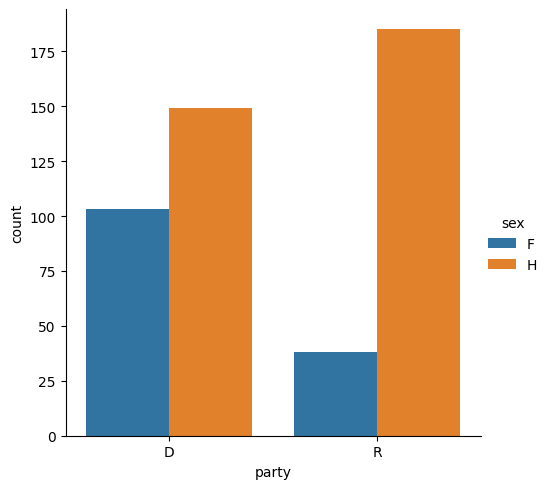

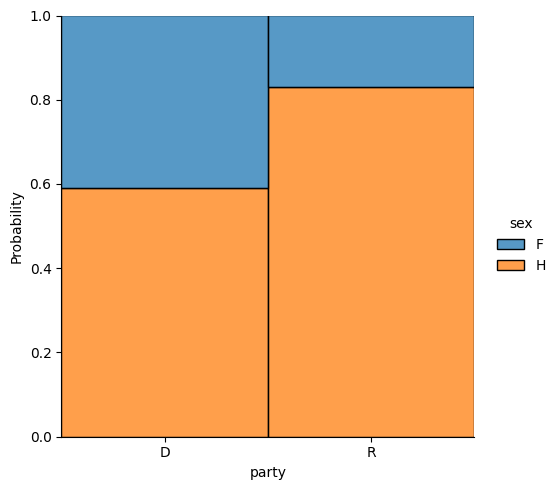

In [28]:
# Comment sont répartis hommes et femmes au sein des partis ?

print("Comment sont répartis hommes et femmes au sein des partis ?")
plot_bivariate(attributes_df, "party", "sex", sex_order)



Comment sont répartis les âges au sein des partis ?


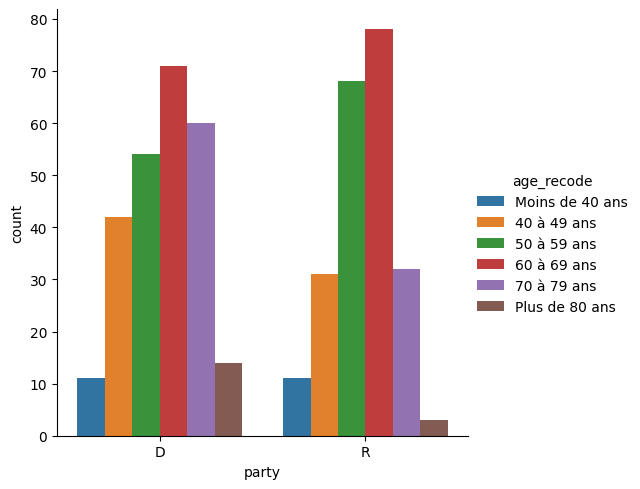

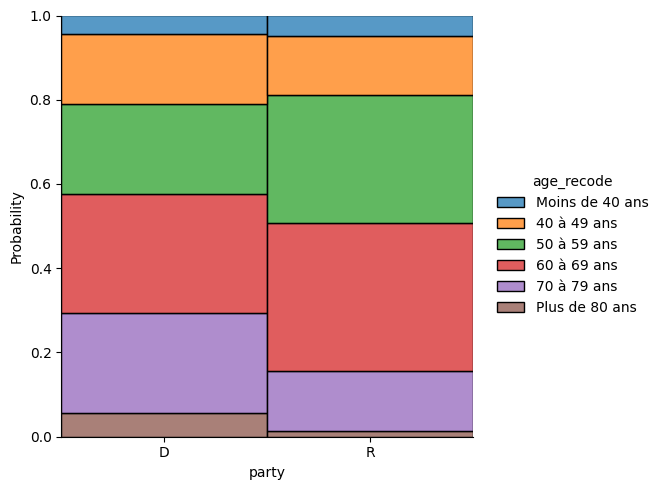

In [29]:
# Comment sont répartis les âges au sein des partis ?

print("Comment sont répartis les âges au sein des partis ?")
plot_bivariate(attributes_df, x = "party", hue = "age_recode", 
               hue_order = age_order)


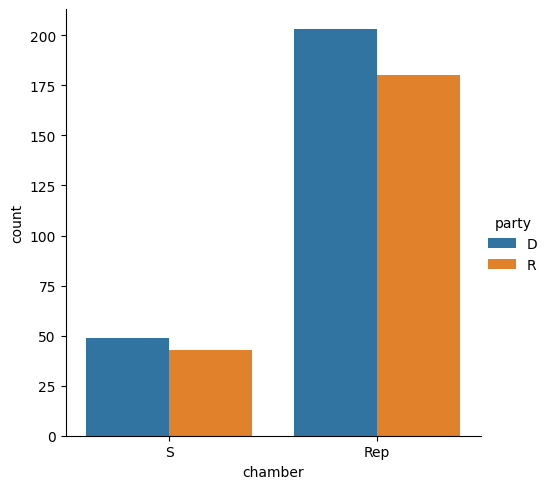

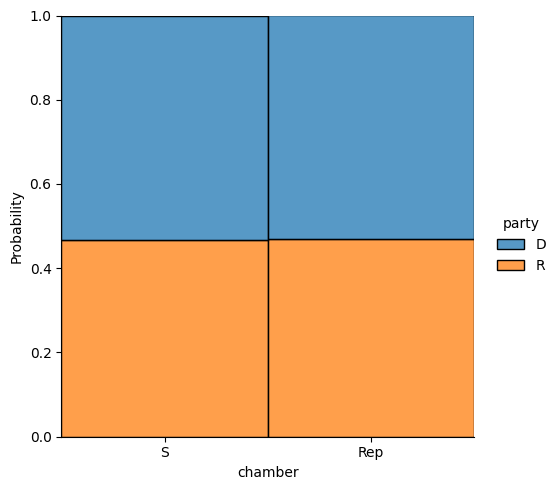

In [30]:
# Quelle répartition des partis au sein des chambres sur l'échantillon ? 
# En réalité, sénat majoritairement D, chambre des représentants majoritairement R

plot_bivariate(attributes_df, x = "chamber", hue = "party", hue_order = party_order)

Comment sont répartis les âges au sein des chambres ?


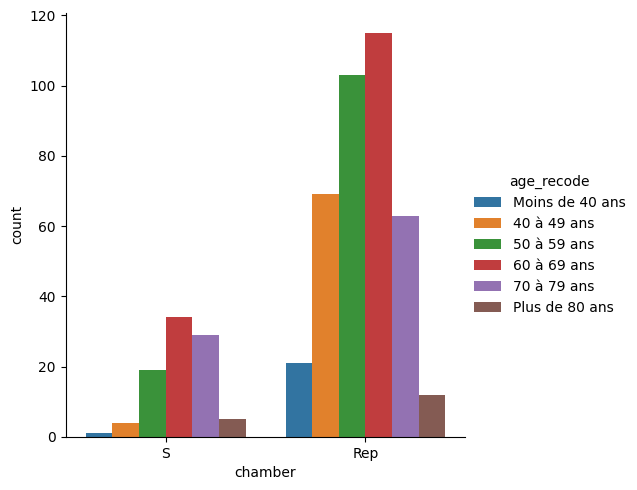

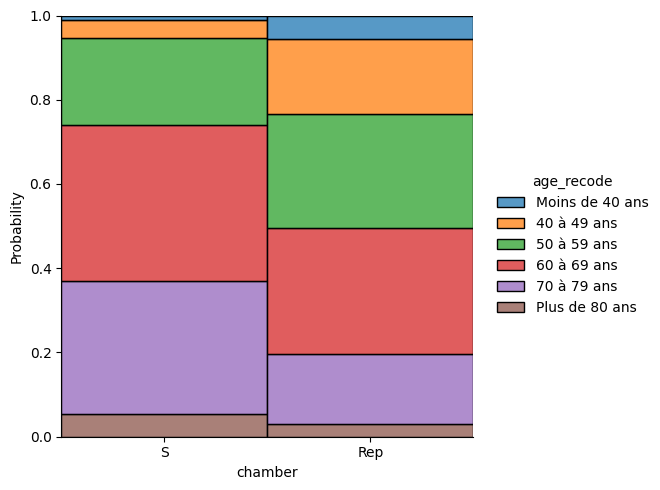

In [31]:
# Comment sont répartis les âges au sein des chambres ?

print("Comment sont répartis les âges au sein des chambres ?")

plot_bivariate(data = attributes_df, x = "chamber", hue = "age_recode", 
               hue_order = age_order)


Comment est réparti le genre au sein des chambres ?


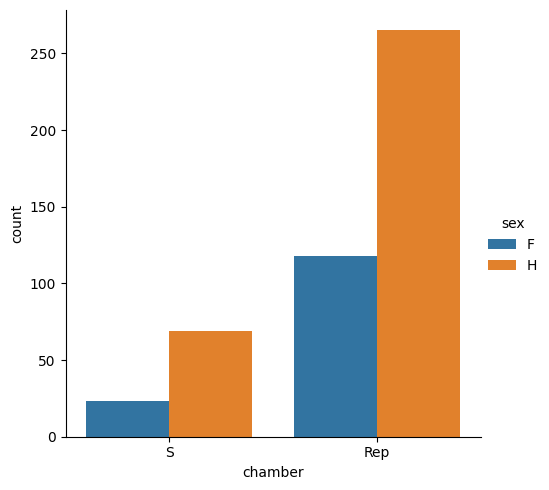

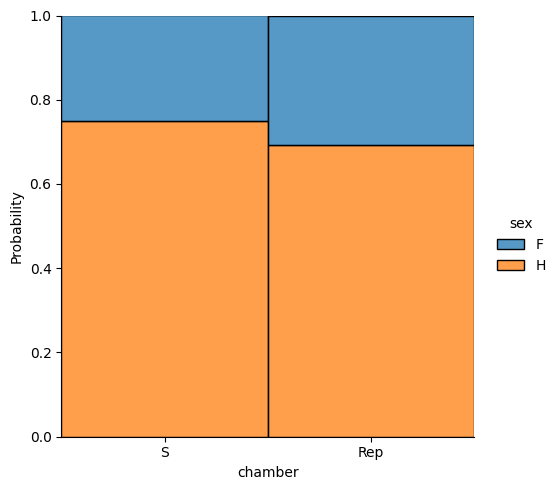

In [32]:
# Comment sont répartis les âges au sein des chambres ?

print("Comment est réparti le genre au sein des chambres ?")

plot_bivariate(data = attributes_df, x = "chamber", hue = "sex", 
               hue_order = sex_order)

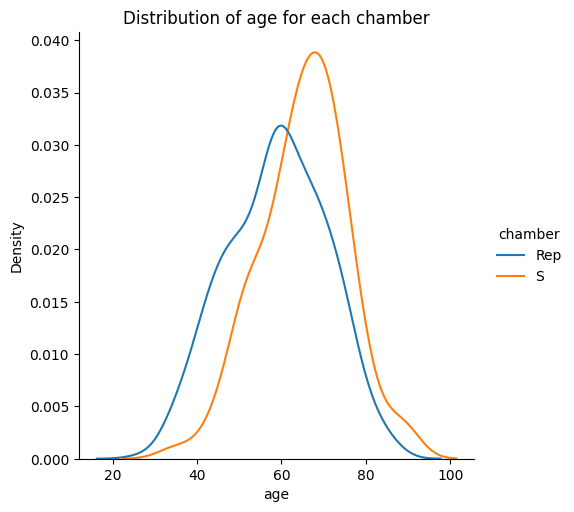

In [33]:
sns.displot(data = attributes_df, x = "age", hue = "chamber", hue_order = chamber_order,
                kind = 'kde', common_norm = False).set(title = f"Distribution of age for each chamber")

On peut constater deux principaux points :
- Le groupe des démocrates est plus équilibré en terme de répartition hommes/femmes que le groupe républicain (~ 40% de femmes contre moins de 20%)
- Les sénateurs sont plus agés que les représentants

### Distribution des poids

In [34]:
attributes_df["congress_member"] = usernameList


Text(0.5, 1.0, 'Comparaison des distributions des degrés entrants et sortants')

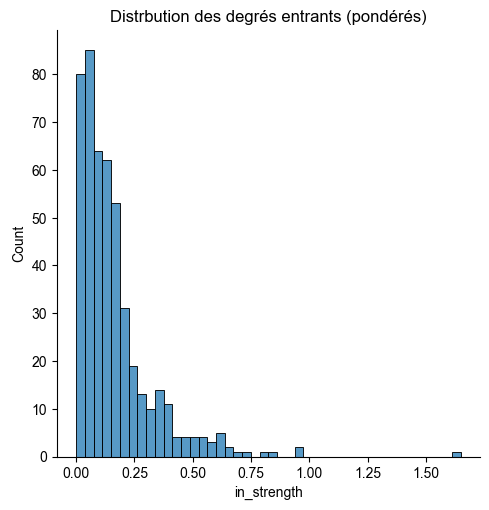

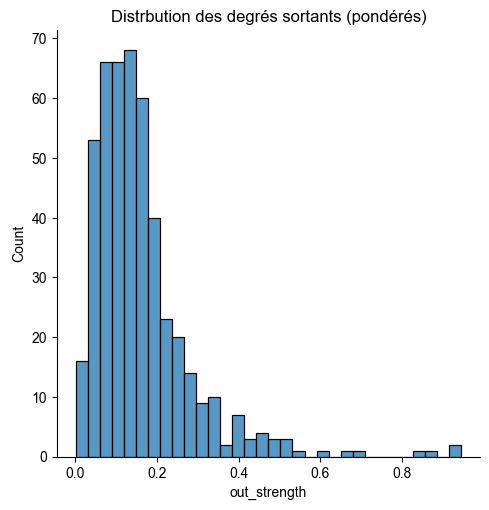

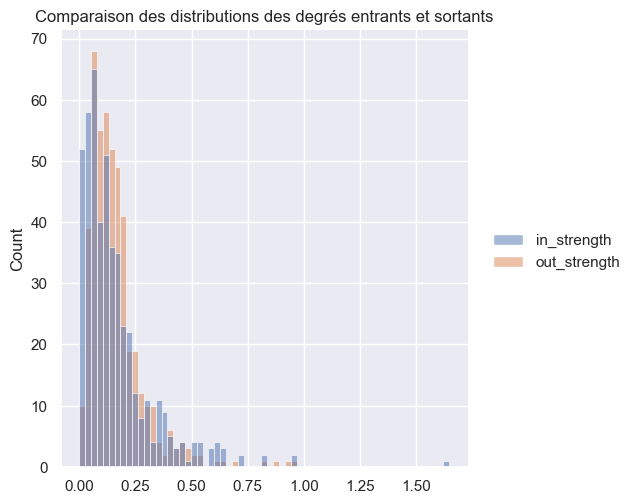

In [35]:
sns.displot(attributes_df, x = "in_strength", kind = "hist" ).set(title="Distrbution des degrés entrants (pondérés)")
sns.displot(attributes_df, x = "out_strength", kind = "hist" ).set(title="Distrbution des degrés sortants (pondérés)")

sns.set_theme()  # <-- This actually changes the look of plots.
sns.displot([attributes_df["in_strength"], attributes_df["out_strength"]], color=['r','b'], alpha=0.5, kind='hist')
plt.title("Comparaison des distributions des degrés entrants et sortants")

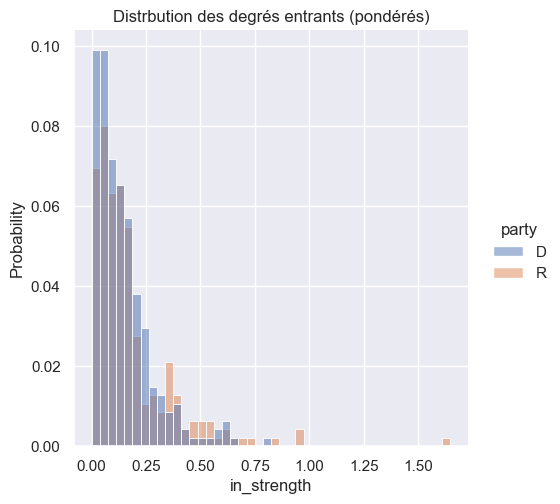

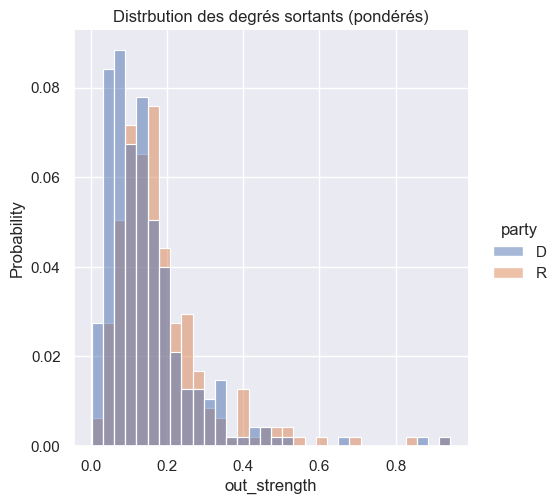

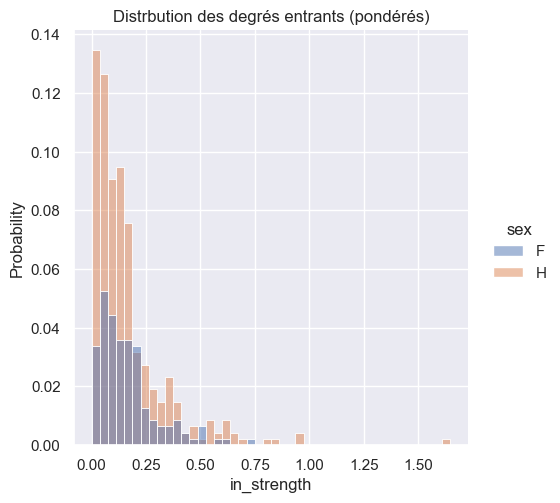

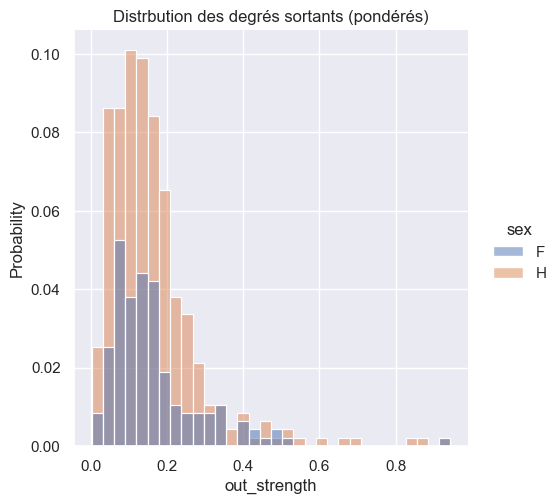

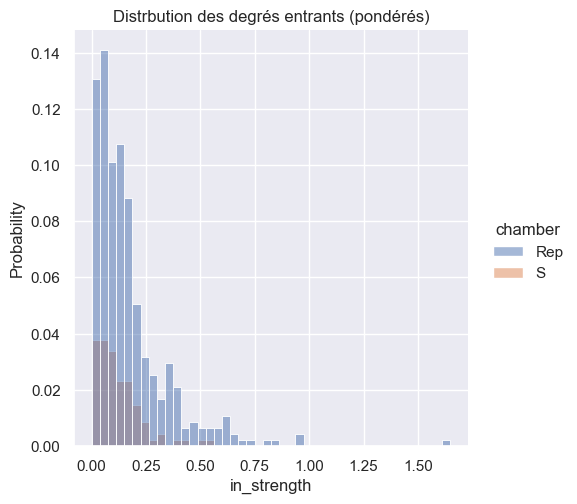

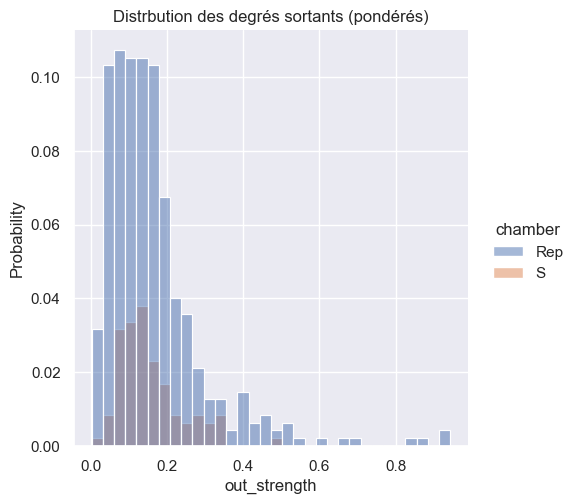

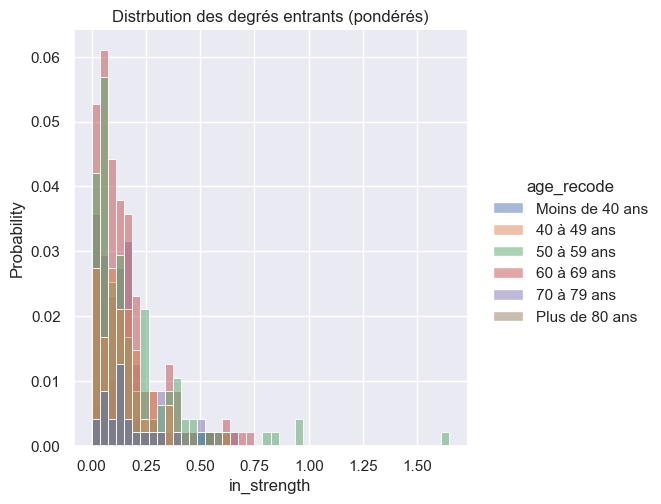

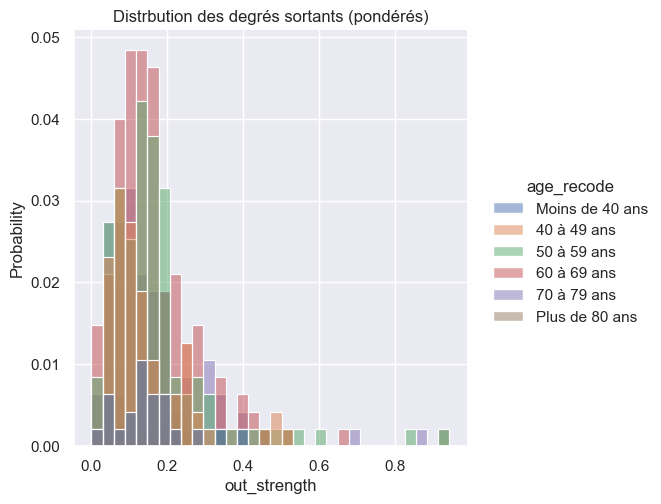

In [36]:
def plot_variable_degree_distribution(hue, hue_order) :
    sns.displot(attributes_df, x = "in_strength", kind = "hist", hue = hue, hue_order = hue_order, stat = "probability").set(title="Distrbution des degrés entrants (pondérés)")
    sns.displot(attributes_df, x = "out_strength", kind = "hist", hue = hue, hue_order = hue_order, stat = "probability", ).set(title="Distrbution des degrés sortants (pondérés)")
    

for i, order in [["party", party_order], ["sex", sex_order], ["chamber", chamber_order], ["age_recode", age_order]] :
    plot_variable_degree_distribution(i, order)

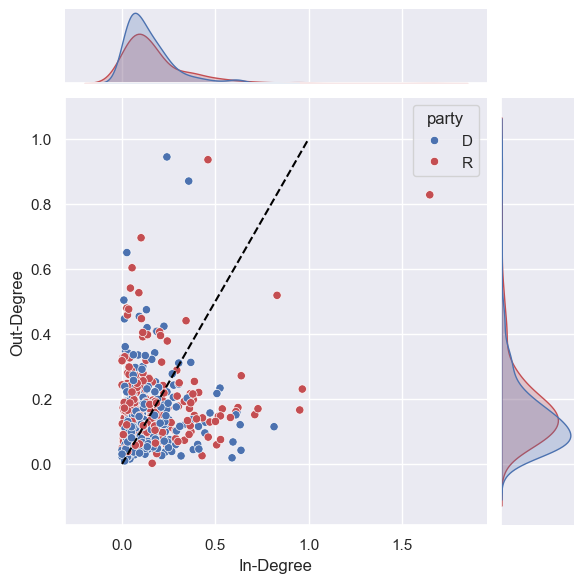

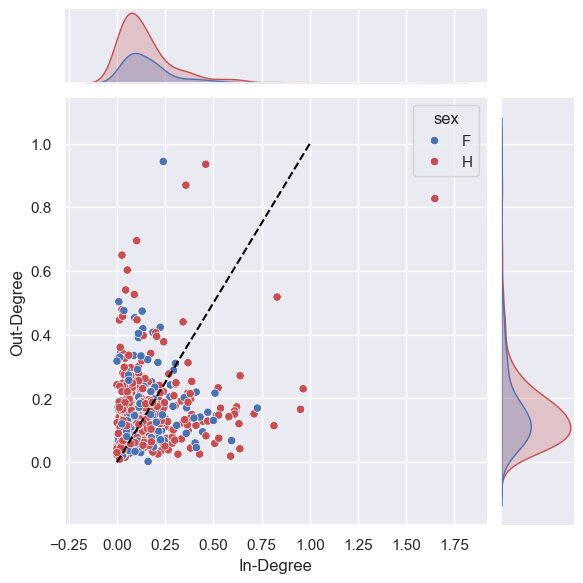

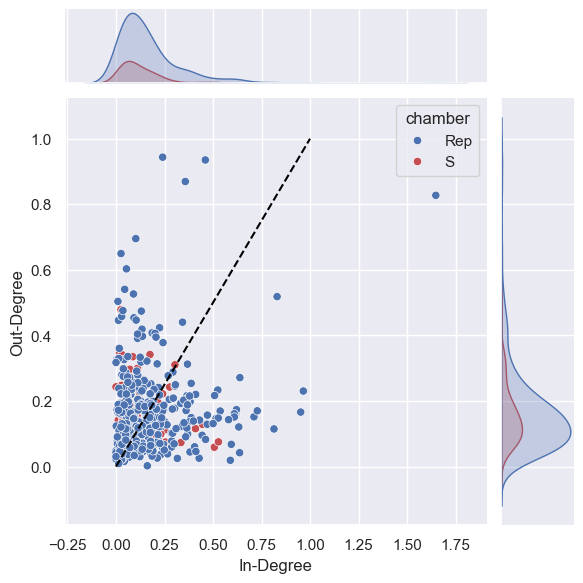

In [51]:
def plot_in_out_attribute(df, att, order) :

    sns.jointplot(data = df, x="in_strength", y ="out_strength", 
                    hue = att, hue_order = order, palette = ['b', 'r']).set_axis_labels(xlabel="In-Degree", ylabel = "Out-Degree")
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
    plt.show()
#so.Plot(str_df, x = str_df.index, y="in_strength").add(so.Dot(), so.Dodge(), so.Jitter(.3))

plot_in_out_attribute(attributes_df, "party", party_order)
plot_in_out_attribute(attributes_df, "sex", sex_order)
plot_in_out_attribute(attributes_df, "chamber", chamber_order)



Correlation entre degré entrant et sortant : [14.0614664]


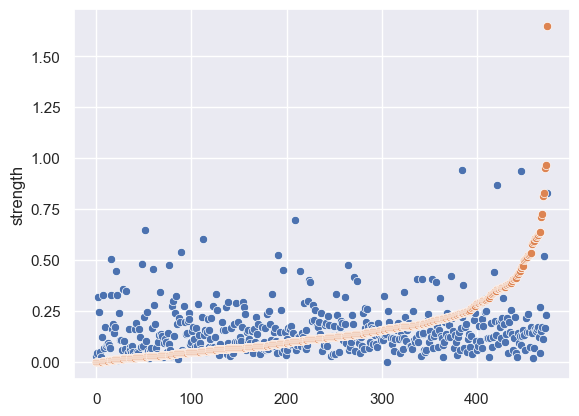

In [38]:
# On ordonne les individus par degré entrant (influence exercée et on plot leurs degrés entrant et sortant)

sns.scatterplot(attributes_df.sort_values('in_strength').reset_index()["out_strength"]).set_ylabel('strength')
sns.scatterplot(attributes_df.sort_values('in_strength').reset_index()["in_strength"]).set_ylabel('strength')

print("Correlation entre degré entrant et sortant :", np.correlate(attributes_df["in_strength"], attributes_df["out_strength"]))

In [39]:
attributes_df

,congress_member,sex,age,party,chamber,age_recode,in_strength,out_strength,sex_party,viral_centrality,strength
0,SenatorBaldwin,F,60,D,S,60 à 69 ans,0.119889,0.080000,FD,0.094066,0.199889
1,SenJohnBarrasso,H,70,R,S,70 à 79 ans,0.129438,0.094637,HR,0.107233,0.224076
2,SenatorBennet,H,60,D,S,60 à 69 ans,0.188040,0.144414,HD,0.165182,0.332454
3,MarshaBlackburn,F,70,R,S,70 à 79 ans,0.078533,0.068803,FR,0.076794,0.147336
4,SenBlumenthal,H,76,D,S,70 à 79 ans,0.101221,0.144161,HD,0.160802,0.245382
...,...,...,...,...,...,...,...,...,...,...,...
470,RepJoeWilson,H,75,R,Rep,70 à 79 ans,0.102018,0.695238,HR,0.810477,0.797256
471,RobWittman,H,63,R,Rep,60 à 69 ans,0.053460,0.221239,HR,0.260282,0.274699
472,rep_stevewomack,H,65,R,Rep,60 à 69 ans,0.178751,0.064198,HR,0.077121,0.242949
473,RepJohnYarmuth,H,75,R,Rep,70 à 79 ans,0.012695,0.171642,HR,0.192596,0.184337


array([[1.        , 0.67071851],
       [0.67071851, 1.        ]])

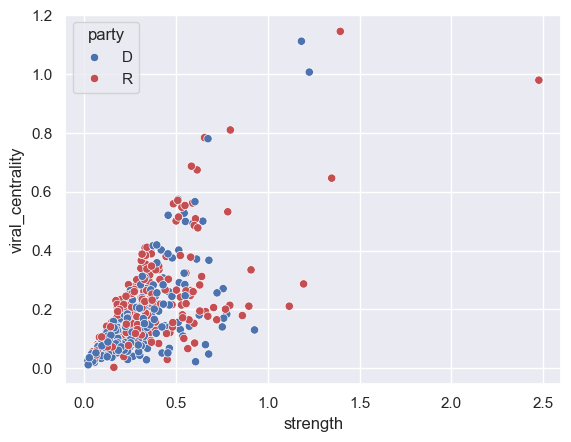

In [40]:
sns.scatterplot(data = attributes_df, x="strength", y ="viral_centrality", 
                hue = "party", hue_order = party_order, palette = ['b', 'r'])

np.corrcoef(attributes_df["viral_centrality"], attributes_df["strength"])

array([[1.        , 0.67071851],
       [0.67071851, 1.        ]])

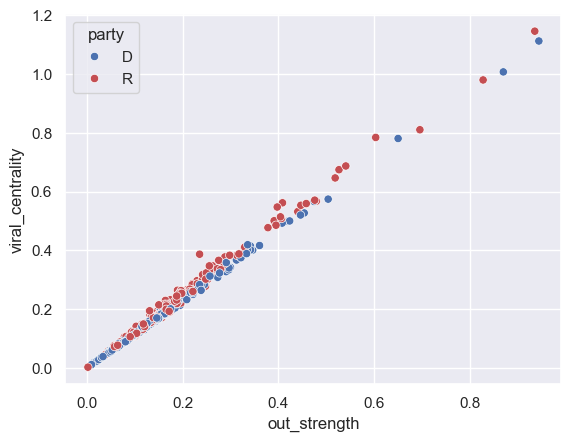

In [54]:
sns.scatterplot(data = attributes_df, x="out_strength", y ="viral_centrality", 
                hue = "party", hue_order = party_order, palette = ['b', 'r'])

np.corrcoef(attributes_df["viral_centrality"], attributes_df["strength"])

Correlation matrix between out-degree and in-degree:
 [[1.         0.15049989]
 [0.15049989 1.        ]] 

Correlation matrix between viral_centrality and in-degree:
 [[1.         0.15116104]
 [0.15116104 1.        ]] 

Correlation matrix between viral_centrality and out-degree:
 [[1.         0.99636597]
 [0.99636597 1.        ]]


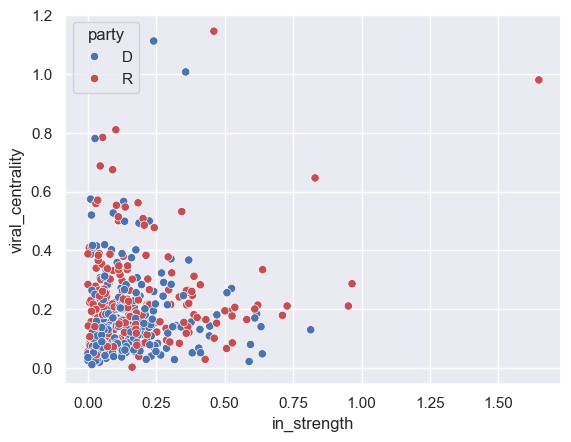

In [60]:

sns.scatterplot(data = attributes_df, x="in_strength", y ="viral_centrality", 
                hue = "party", hue_order = party_order, palette = ['b', 'r'])

print("Correlation matrix between out-degree and in-degree:\n",np.corrcoef(attributes_df["out_strength"], attributes_df["in_strength"]), "\n")

print("Correlation matrix between viral_centrality and in-degree:\n",np.corrcoef(attributes_df["viral_centrality"], attributes_df["in_strength"]), "\n")
print("Correlation matrix between viral_centrality and out-degree:\n", np.corrcoef(attributes_df["viral_centrality"], attributes_df["out_strength"]))

In [43]:
attributes_df.sort_values('in_strength')

,congress_member,sex,age,party,chamber,age_recode,in_strength,out_strength,sex_party,viral_centrality,strength
434,RepTomSuozzi,H,60,D,Rep,60 à 69 ans,0.000000,0.030303,HD,0.035321,0.030303
356,RepOHalleran,H,76,D,Rep,70 à 79 ans,0.000000,0.042802,HD,0.048599,0.042802
456,RepAnnWagner,F,59,R,Rep,50 à 59 ans,0.000000,0.317308,FR,0.387938,0.317308
31,ChuckGrassley,H,89,R,S,Plus de 80 ans,0.000000,0.243028,HR,0.283954,0.243028
227,Lancegooden,H,40,R,Rep,40 à 49 ans,0.000000,0.048518,HR,0.055649,0.048518
...,...,...,...,...,...,...,...,...,...,...,...
147,RepCasten,H,51,D,Rep,50 à 59 ans,0.814185,0.114572,HD,0.129823,0.928757
208,RepFranklin,H,58,R,Rep,50 à 59 ans,0.830226,0.518325,HR,0.646444,1.348551
389,RepChipRoy,H,50,R,Rep,50 à 59 ans,0.951853,0.165984,HR,0.210713,1.117836
269,RepMikeJohnson,H,50,R,Rep,50 à 59 ans,0.965445,0.230277,HR,0.286434,1.195723


### Assortativity (homophilie) et visu

In [44]:
G = nx.read_edgelist("../congress_network/congress.edgelist", create_using=nx.DiGraph(), nodetype=int)
Attribute_data = attributes_df.to_dict('index').items()

Attribute_data

dict_items([(0, {'congress_member': 'SenatorBaldwin', 'sex': 'F', 'age': 60, 'party': 'D', 'chamber': 'S', 'age_recode': '60 à 69 ans', 'in_strength': 0.11988948836745936, 'out_strength': 0.08, 'sex_party': 'FD', 'viral_centrality': 0.09406628049941235, 'strength': 0.19988948836745934}), (1, {'congress_member': 'SenJohnBarrasso', 'sex': 'H', 'age': 70, 'party': 'R', 'chamber': 'S', 'age_recode': '70 à 79 ans', 'in_strength': 0.12943841471326195, 'out_strength': 0.09463722397476336, 'sex_party': 'HR', 'viral_centrality': 0.10723340314139795, 'strength': 0.22407563868802532}), (2, {'congress_member': 'SenatorBennet', 'sex': 'H', 'age': 60, 'party': 'D', 'chamber': 'S', 'age_recode': '60 à 69 ans', 'in_strength': 0.18803979856692205, 'out_strength': 0.1444141689373297, 'sex_party': 'HD', 'viral_centrality': 0.16518172895705718, 'strength': 0.3324539675042517}), (3, {'congress_member': 'MarshaBlackburn', 'sex': 'F', 'age': 70, 'party': 'R', 'chamber': 'S', 'age_recode': '70 à 79 ans', 'in_

In [45]:
G.add_nodes_from(Attribute_data)

In [46]:
G.edges(data = True)

OutEdgeDataView([(0, 4, {'weight': 0.002105263157894737}), (0, 12, {'weight': 0.002105263157894737}), (0, 18, {'weight': 0.002105263157894737}), (0, 25, {'weight': 0.004210526315789474}), (0, 30, {'weight': 0.002105263157894737}), (0, 46, {'weight': 0.00631578947368421}), (0, 55, {'weight': 0.002105263157894737}), (0, 58, {'weight': 0.002105263157894737}), (0, 59, {'weight': 0.004210526315789474}), (0, 74, {'weight': 0.002105263157894737}), (0, 76, {'weight': 0.004210526315789474}), (0, 77, {'weight': 0.002105263157894737}), (0, 85, {'weight': 0.002105263157894737}), (0, 86, {'weight': 0.002105263157894737}), (0, 87, {'weight': 0.00631578947368421}), (0, 154, {'weight': 0.002105263157894737}), (0, 168, {'weight': 0.00631578947368421}), (0, 341, {'weight': 0.010526315789473684}), (0, 374, {'weight': 0.01263157894736842}), (0, 401, {'weight': 0.002105263157894737}), (4, 0, {'weight': 0.0036496350364963502}), (4, 3, {'weight': 0.016423357664233577}), (4, 12, {'weight': 0.00182481751824817

In [47]:
G.nodes(data=True)

NodeDataView({0: {'congress_member': 'SenatorBaldwin', 'sex': 'F', 'age': 60, 'party': 'D', 'chamber': 'S', 'age_recode': '60 à 69 ans', 'in_strength': 0.11988948836745936, 'out_strength': 0.08, 'sex_party': 'FD', 'viral_centrality': 0.09406628049941235, 'strength': 0.19988948836745934}, 4: {'congress_member': 'SenBlumenthal', 'sex': 'H', 'age': 76, 'party': 'D', 'chamber': 'S', 'age_recode': '70 à 79 ans', 'in_strength': 0.10122118617896246, 'out_strength': 0.1441605839416058, 'sex_party': 'HD', 'viral_centrality': 0.16080217462573398, 'strength': 0.24538177012056828}, 12: {'congress_member': 'SenatorCardin', 'sex': 'H', 'age': 79, 'party': 'D', 'chamber': 'S', 'age_recode': '70 à 79 ans', 'in_strength': 0.44546718694278853, 'out_strength': 0.12855209742895804, 'sex_party': 'HD', 'viral_centrality': 0.1422899925982799, 'strength': 0.5740192843717465}, 18: {'congress_member': 'SenCortezMasto', 'sex': 'F', 'age': 58, 'party': 'D', 'chamber': 'S', 'age_recode': '50 à 59 ans', 'in_strengt

In [48]:
print("assortativity for degree :", nx.assortativity.degree_assortativity_coefficient(G, weight='weight'))
print("Unweighted assortativity for degree :", nx.assortativity.degree_assortativity_coefficient(G))

print("assortativity for party :", nx.assortativity.attribute_assortativity_coefficient(G, "party"))

print("assortativity for sex :", nx.assortativity.attribute_assortativity_coefficient(G, "sex"))

print("assortativity for chamber :", nx.assortativity.attribute_assortativity_coefficient(G, "chamber"))

print("assortativity for age :", nx.assortativity.attribute_assortativity_coefficient(G, "age_recode"))
print("assortativity for age (numeric) :", nx.assortativity.numeric_assortativity_coefficient(G, "age"))


assortativity for degree : -0.03789907748052852
Unweighted assortativity for degree : -0.09621432852852249
assortativity for party : 0.6875803362065313
assortativity for sex : 0.13775778808528222
assortativity for chamber : 0.5879229385150418
assortativity for age : 0.033917253482570194
assortativity for age (numeric) : 0.09963010517100812


In [49]:
G.in_degree(weight = 'weight')
G.out_degree(weight = 'weight')

nx.eigenvector_centrality(G, weight = 'weight', max_iter=10000).

SyntaxError: invalid syntax (2373710921.py, line 4)

In [ ]:
nx.reciprocity(G)

0.4615847693581157

In [ ]:
def draw_graph(G : nx.Graph, attribute : pd.Series, attribute_order, colors : list) :
    if len(attribute_order) != len(colors) : return("Error : number of attribute values and colors are different")
    node_color = len(attribute)*[0]
    for i in range(len(attribute)) :
        att = attribute[i]
        k = attribute_order.index(att)
        node_color[i] = colors[k]
    
    nx.draw(G, node_color = node_color)

In [53]:
nx.draw_networkx_nodes(G, node_size = attributes_df["viral_centrality"])

TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'